<a href="https://colab.research.google.com/github/Pranjal-777/E-commerce_Customer_Data_For_Behavior_Analysis/blob/main/E_commerce_Customer_data_for_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

# Inspect the dataset
print(data.info())
print(data.head())


Saving ecommerce_customer_data_custom_ratios.csv to ecommerce_customer_data_custom_ratios.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  


1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?

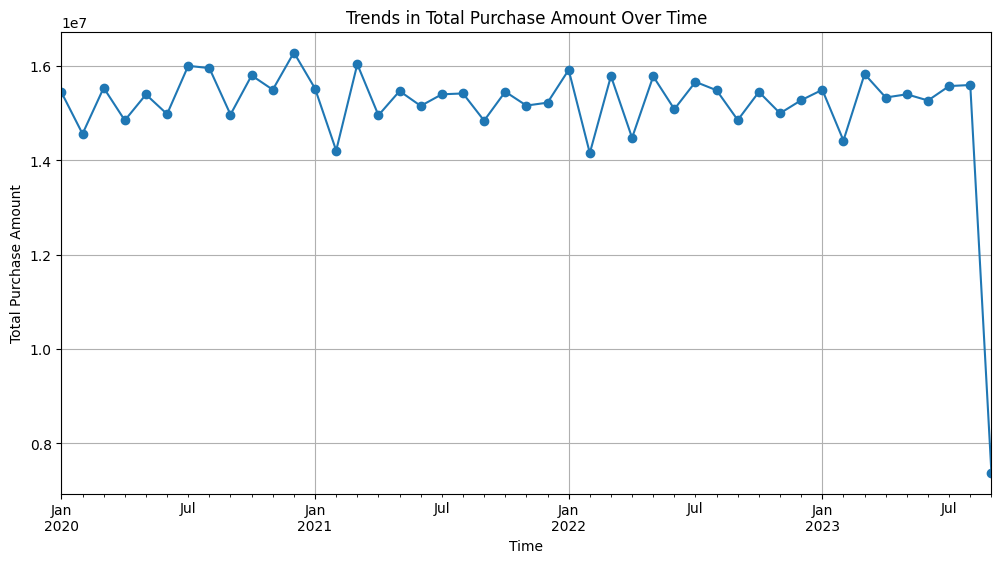

In [4]:
import matplotlib.pyplot as plt

# Convert 'Purchase Date' to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Group by month or date and calculate total purchase amount
data['YearMonth'] = data['Purchase Date'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['Total Purchase Amount'].sum()

# Plot trends
monthly_sales.plot(figsize=(12, 6), marker='o', title='Trends in Total Purchase Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Purchase Amount')
plt.grid()
plt.show()


2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?


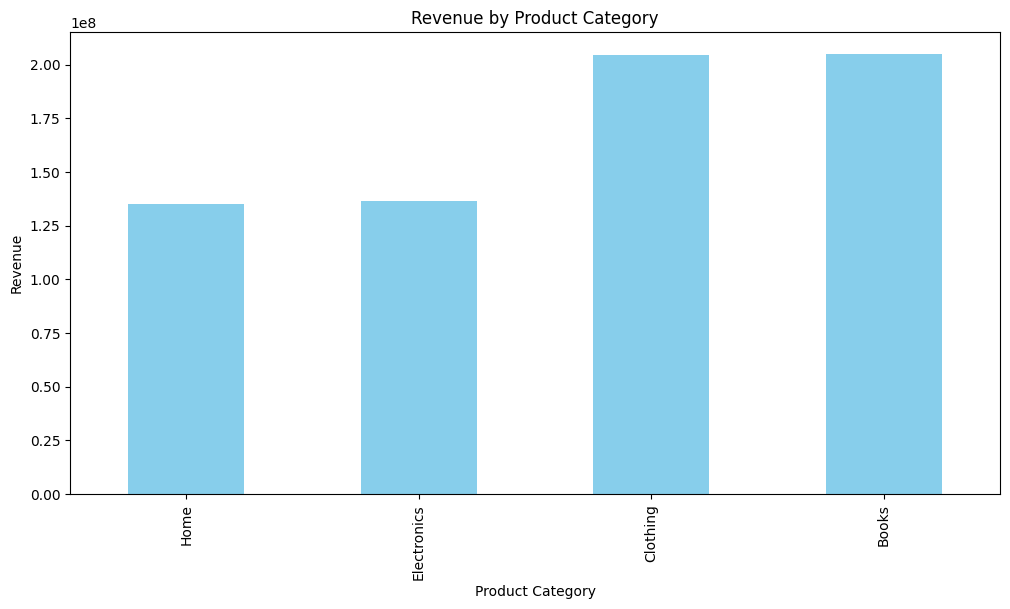

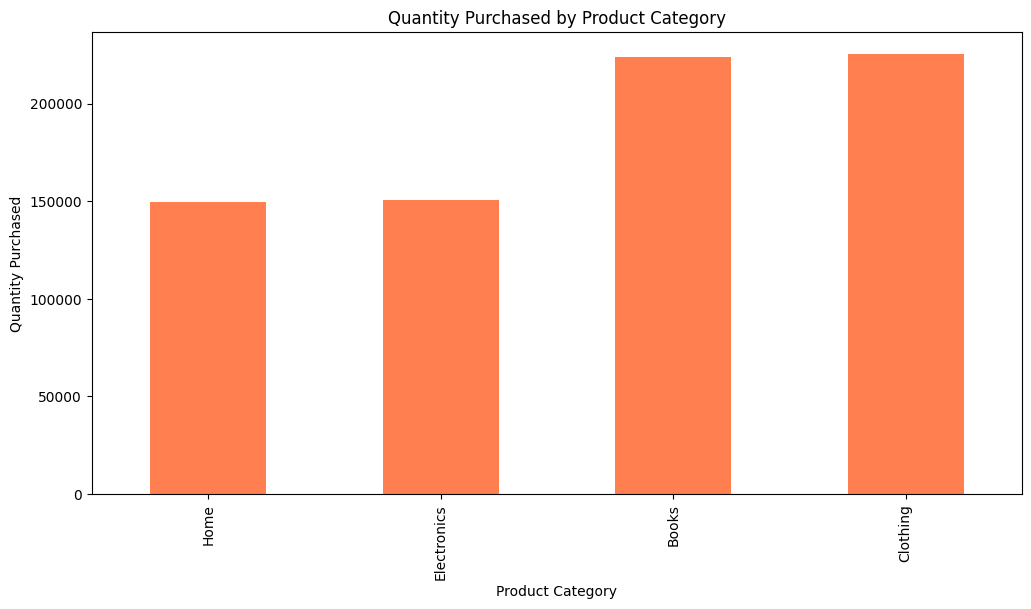

In [7]:
import seaborn as sns

# Calculate revenue and quantity per category
category_revenue = data.groupby('Product Category')['Total Purchase Amount'].sum()
category_quantity = data.groupby('Product Category')['Quantity'].sum()

# Plot revenue
plt.figure(figsize=(12, 6))
category_revenue.sort_values().plot(kind='bar', title='Revenue by Product Category', color='skyblue')
plt.ylabel('Revenue')
plt.show()

# Plot quantity
plt.figure(figsize=(12, 6))
category_quantity.sort_values().plot(kind='bar', title='Quantity Purchased by Product Category', color='coral')
plt.ylabel('Quantity Purchased')
plt.show()


3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?


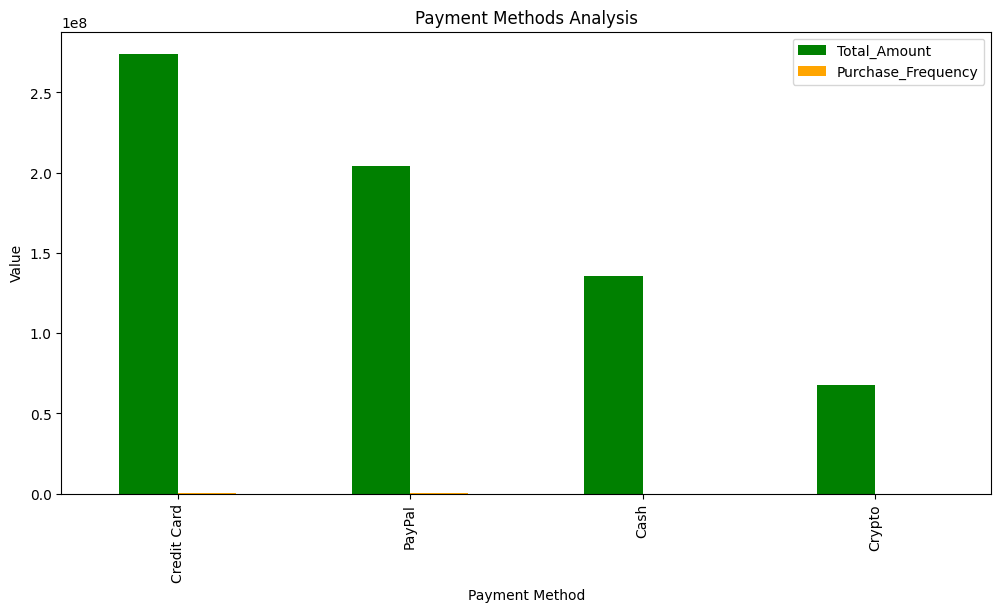

In [10]:
# Calculate total purchase amount and count for each payment method
payment_analysis = data.groupby('Payment Method').agg(
    Total_Amount=('Total Purchase Amount', 'sum'),
    Purchase_Frequency=('Total Purchase Amount', 'count')
)

# Visualize
payment_analysis.sort_values('Total_Amount', ascending=False).plot(
    kind='bar', figsize=(12, 6), title='Payment Methods Analysis', color=['green', 'orange']
)
plt.ylabel('Value')
plt.show()


4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?


Top Customers by Total Purchase Amount:
        Customer ID        Customer Name  Total_Amount  Purchase_Frequency
36211        36437           Jesse Gray         55339                  17
39561        39817  Dr. Courtney Foster         51718                  17
26818        26977      Felicia Escobar         48497                  14
5809          5844          Maria Owens         46541                  12
3555          3576        Aaron Harrell         46518                  14
13718        13802   Jonathan Schroeder         46464                  13
802            809        Taylor Bishop         45738                  15
46785        47087         Debbie Lopez         45700                  17
14313        14400    Patricia Petersen         45334                  15
20186        20305        Randall Hobbs         45044                  14
Top Customers by Purchase Frequency:
        Customer ID        Customer Name  Total_Amount  Purchase_Frequency
36211        36437           Jess

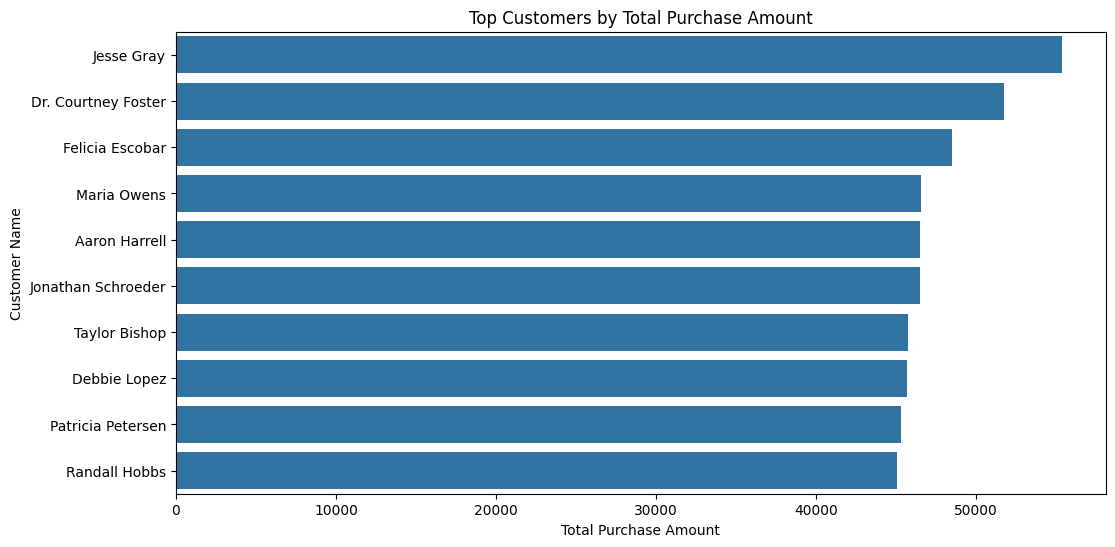

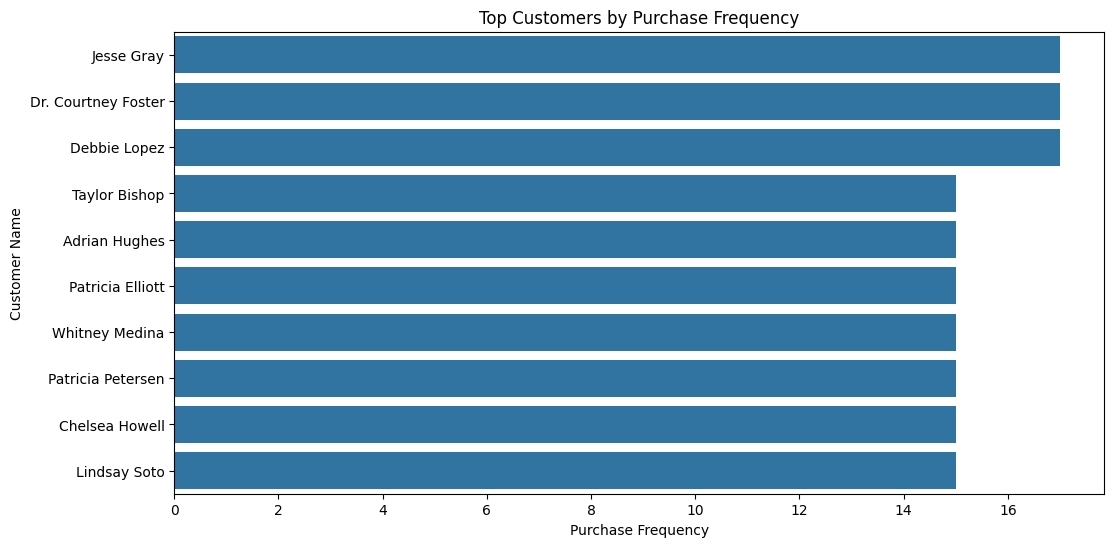

In [11]:
# Calculate total amount and frequency for each customer
customer_analysis = data.groupby(['Customer ID', 'Customer Name']).agg(
    Total_Amount=('Total Purchase Amount', 'sum'),
    Purchase_Frequency=('Total Purchase Amount', 'count')
).reset_index()

# Top customers by purchase amount
top_customers_amount = customer_analysis.nlargest(10, 'Total_Amount')
print("Top Customers by Total Purchase Amount:\n", top_customers_amount)

# Top customers by frequency
top_customers_frequency = customer_analysis.nlargest(10, 'Purchase_Frequency')
print("Top Customers by Purchase Frequency:\n", top_customers_frequency)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Amount', y='Customer Name', data=top_customers_amount)
plt.title('Top Customers by Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Customer Name')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Purchase_Frequency', y='Customer Name', data=top_customers_frequency)
plt.title('Top Customers by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Customer Name')
plt.show()
